In [71]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib as plt
import numpy as np

data_to_load = Path(r"C:\Users\nrhl1\OneDrive\Desktop\UTBootcamp\Project-1\Data\us_disaster_declarations.csv")
data = pd.read_csv(data_to_load)

In [72]:
data = data[["state", "fy_declared", "incident_type","declaration_date"]]
data.columns = ["State", "Year", "Type", "Date"]

In [82]:
data["Date"] = [str(x)[:10] for x in data['Date']]
data["Month"] = [str(x)[5:7] for x in data['Date']]

def determineSeason(month):
    if month in ["12","01","02"]:
        output = "Winter"
    elif month in ["03","04","05"]:
        output = "Spring"
    elif month in ["06","07", "08"]:
        output = "Summer"
    else:
        output = "Fall"
    return output
data["Season"] = [determineSeason(x) for x in data["Month"]]
data_novid = data[(data["Year"]<2020) | (data["Year"]>2021)]

data_novid

,State,Year,Type,Date,Month,Season
0,GA,1953,Tornado,1953-05-02,05,Spring
1,TX,1953,Tornado,1953-05-15,05,Spring
2,LA,1953,Flood,1953-05-29,05,Spring
3,MI,1953,Tornado,1953-06-02,06,Summer
4,MT,1953,Flood,1953-06-06,06,Summer
...,...,...,...,...,...,...
64087,ME,2023,Severe Storm,2023-03-22,03,Spring
64088,MS,2023,Severe Storm,2023-03-26,03,Spring
64089,MS,2023,Severe Storm,2023-03-26,03,Spring
64090,MS,2023,Severe Storm,2023-03-26,03,Spring


In [89]:
monthData = data.groupby(["Month"]).count()["Date"]
monthNovid = data_novid.groupby(["Month"]).count()["Date"]
stateData = data.groupby(["State"]).count()["Date"]
seasonData = data.groupby(["Season"]).count()["Type"]
seasonDataNovid = data_novid.groupby(["Season"]).count()["Type"]
#typeData = data.groupby(["Type"]).count()
yearData = data.groupby(["Year"]).count()
state = "TX"
texas = data[data["State"] == state]
groupedTexas = texas.groupby(["Year"]).count()["State"]
stateData = stateData.sort_values(ascending=False)
#groupedTexas = groupedTexas.sort_values(ascending=False)
monthData

Month
01     5054
02     4515
03    11051
04     6270
05     4687
06     4753
07     4645
08     5103
09    10667
10     3750
11     1574
12     2023
Name: Date, dtype: int64

<Axes: title={'center': 'Number of Disasters per Month'}, xlabel='Month', ylabel='Number of Disasters'>

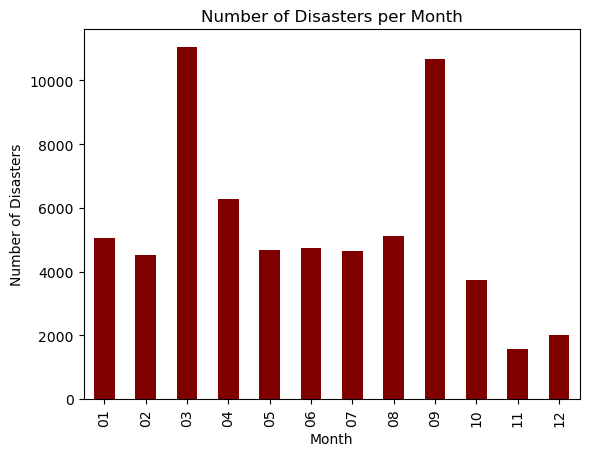

In [90]:
monthData.plot.bar(title="Number of Disasters per Month", ylabel="Number of Disasters", color="maroon")

<Axes: title={'center': 'Number of Disasters per Month w/o Covid'}, xlabel='Month', ylabel='Number of Disasters'>

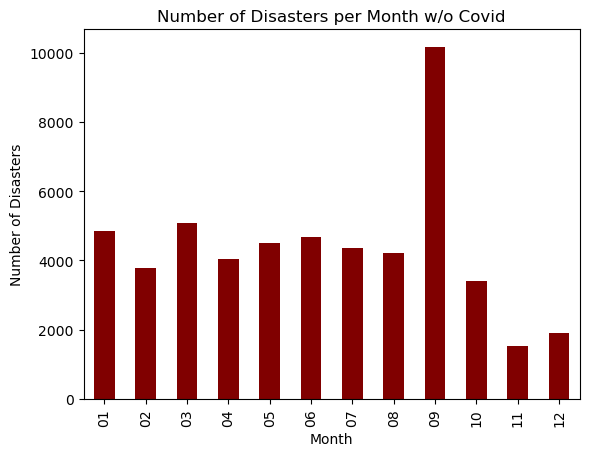

In [91]:
monthNovid.plot.bar(title="Number of Disasters per Month w/o Covid", ylabel="Number of Disasters", color="maroon")

<Axes: title={'center': 'Number of Disasters per Season'}, xlabel='Season', ylabel='Number of Disasters'>

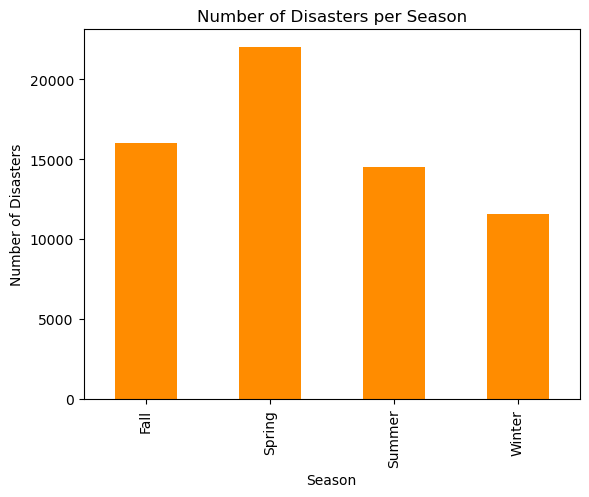

In [92]:
seasonData.plot.bar(title="Number of Disasters per Season", ylabel="Number of Disasters", color="darkorange")

<Axes: title={'center': 'Number of Disasters per Season w/o Covid'}, xlabel='Season', ylabel='Number of Disasters'>

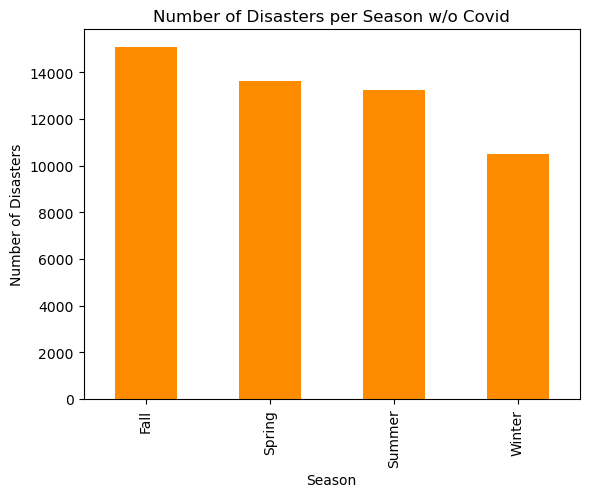

In [93]:
seasonDataNovid.plot.bar(title="Number of Disasters per Season w/o Covid", ylabel="Number of Disasters", color="darkorange")

<Axes: title={'center': 'Texas Frequency of Disasters by Year'}, xlabel='Year', ylabel='Number of Disasters'>

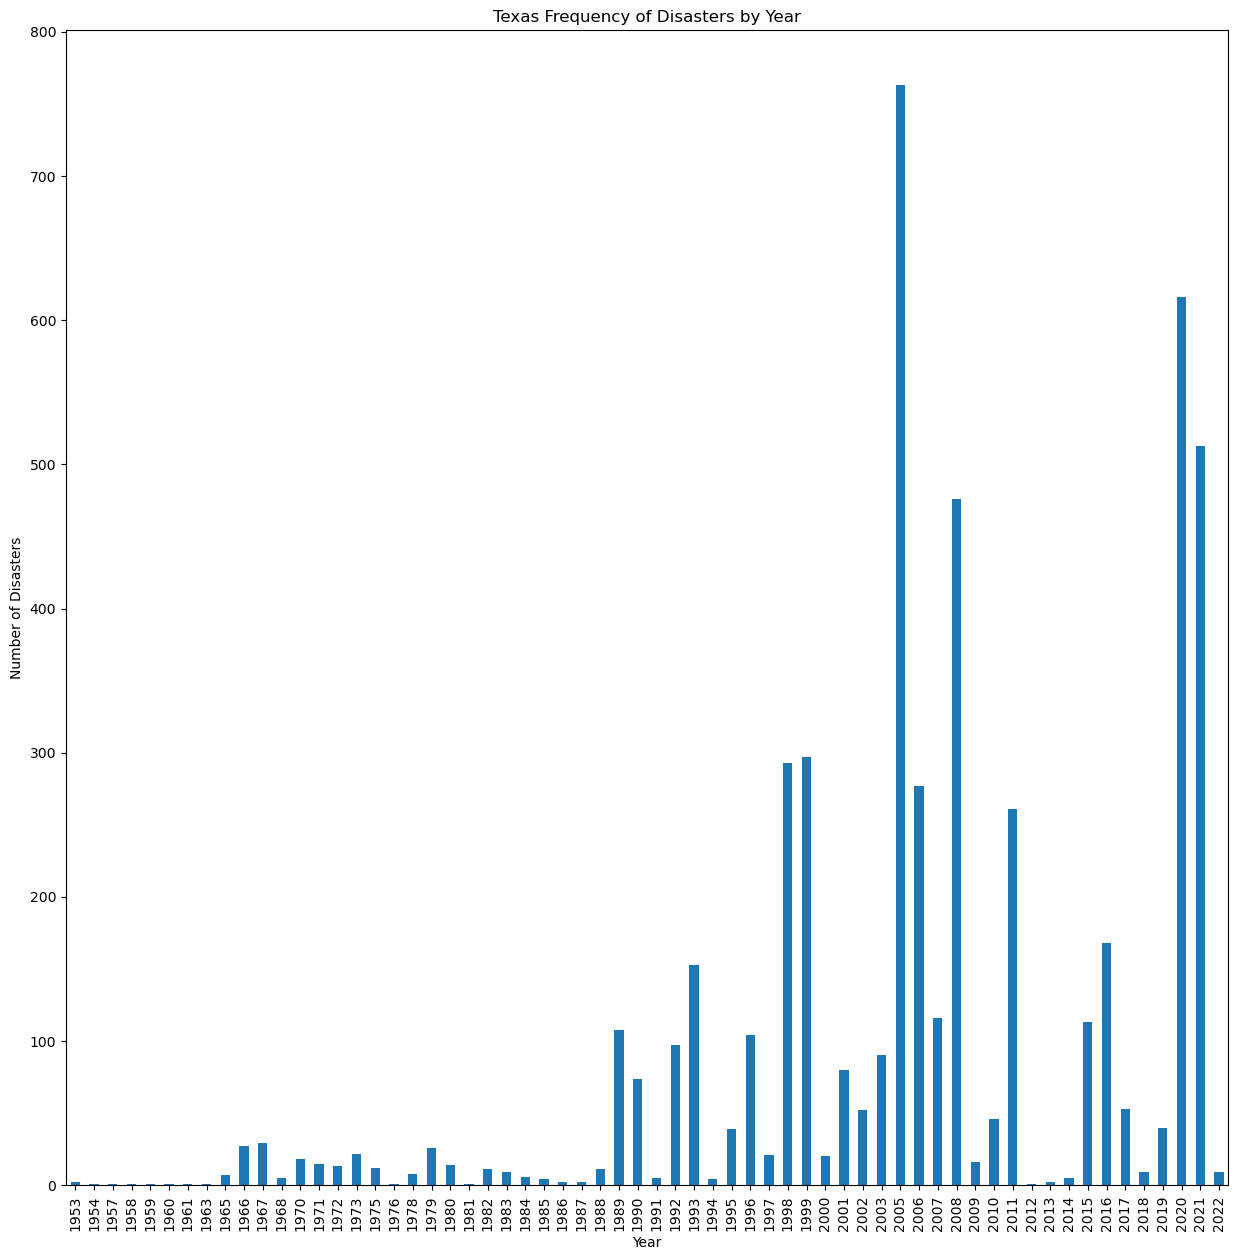

In [50]:
groupedTexas.plot.bar(title="Texas Frequency of Disasters by Year", ylabel="Number of Disasters", figsize=(15,15))